<a href="https://colab.research.google.com/github/CemOguz/Data-Visualization/blob/main/Cem's_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><center>How to make a successful song on Spotify?🎵🎚️🎶</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('spotify-2023.csv',encoding='latin-1')

In [ ]:
# Display the first few rows of the dataset
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
# Handling missing values in the 'key' column
data['key'].fillna(data['key'].mode()[0], inplace=True)  # Filling missing values with the mode
#we drop the shazam column as it is not important to our project
data.drop('in_shazam_charts',axis = 1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  key                   953 non-null    object
 15  mode                  953 non-null    ob

In [ ]:
# Converting 'streams'- column into a numeric value.
data['streams'] = pd.to_numeric(data['streams'], errors='coerce', downcast="integer")

In [ ]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
# Summary statistics
data.describe()[["released_year","in_spotify_playlists","streams","valence_%","energy_%",	"acousticness_%",	"instrumentalness_%",	"liveness_%",	"speechiness_%"]]

,released_year,in_spotify_playlists,streams,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,2018.238195,5200.124869,5.141374e+08,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,11.116218,7897.608990,5.668569e+08,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1930.000000,31.000000,2.762000e+03,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,2020.000000,875.000000,1.416362e+08,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2022.000000,2224.000000,2.905309e+08,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2022.000000,5542.000000,6.738690e+08,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,2023.000000,52898.000000,3.703895e+09,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
# Data distribution and correlation analysis
data.corr()

<ipython-input-15-c95790a3c069>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.136463,-0.051074,-0.088597,-0.003732,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.230803,-0.198998,-0.035842,0.095389,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.024938,-0.000164,-0.019064,-0.005286,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.010598,0.026410,0.011086,0.073288,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789822,0.708277,0.271317,0.144342,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.245821,0.233354,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.228598,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772063,1.000000,0.414523,0.369032,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320234,0.414523,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_charts,-0.003732,0.095389,-0.005286,0.073288,0.144342,0.600205,0.228598,0.369032,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555


<ipython-input-16-743fdfad9e3a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


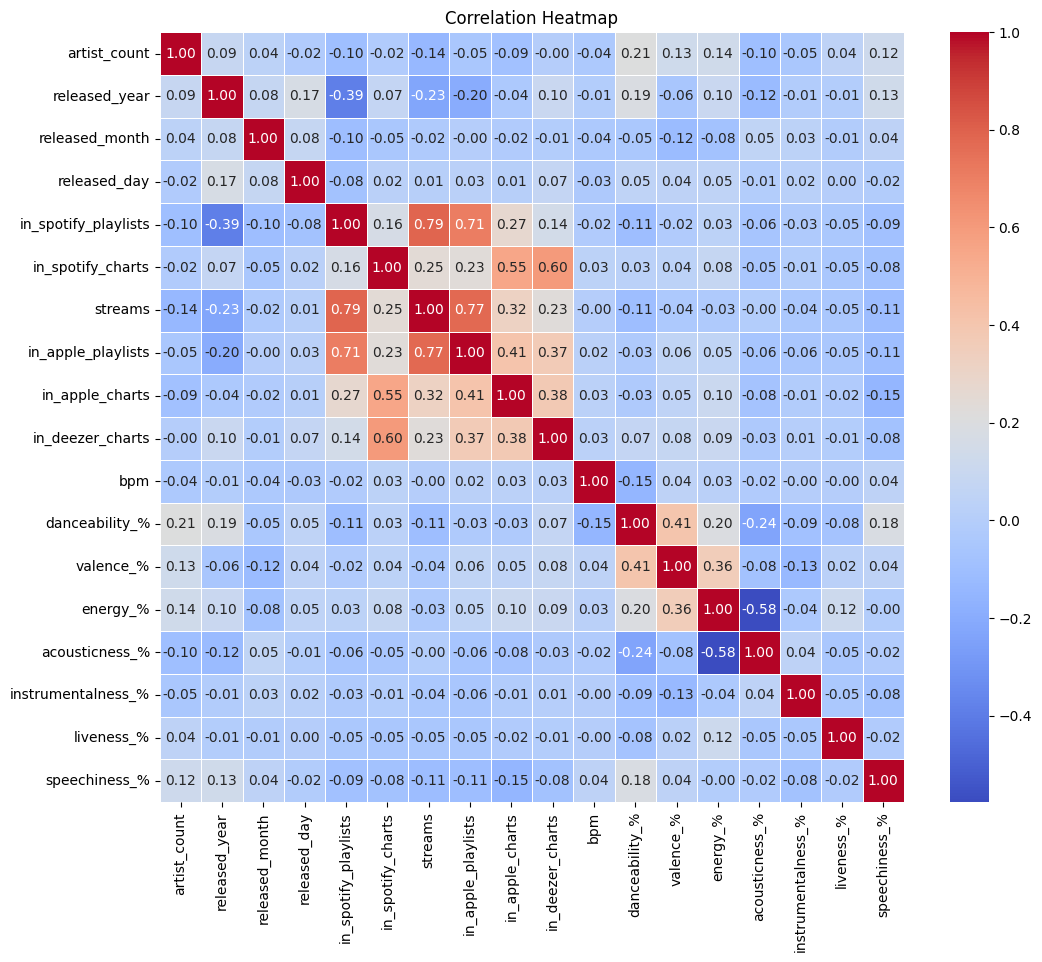

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

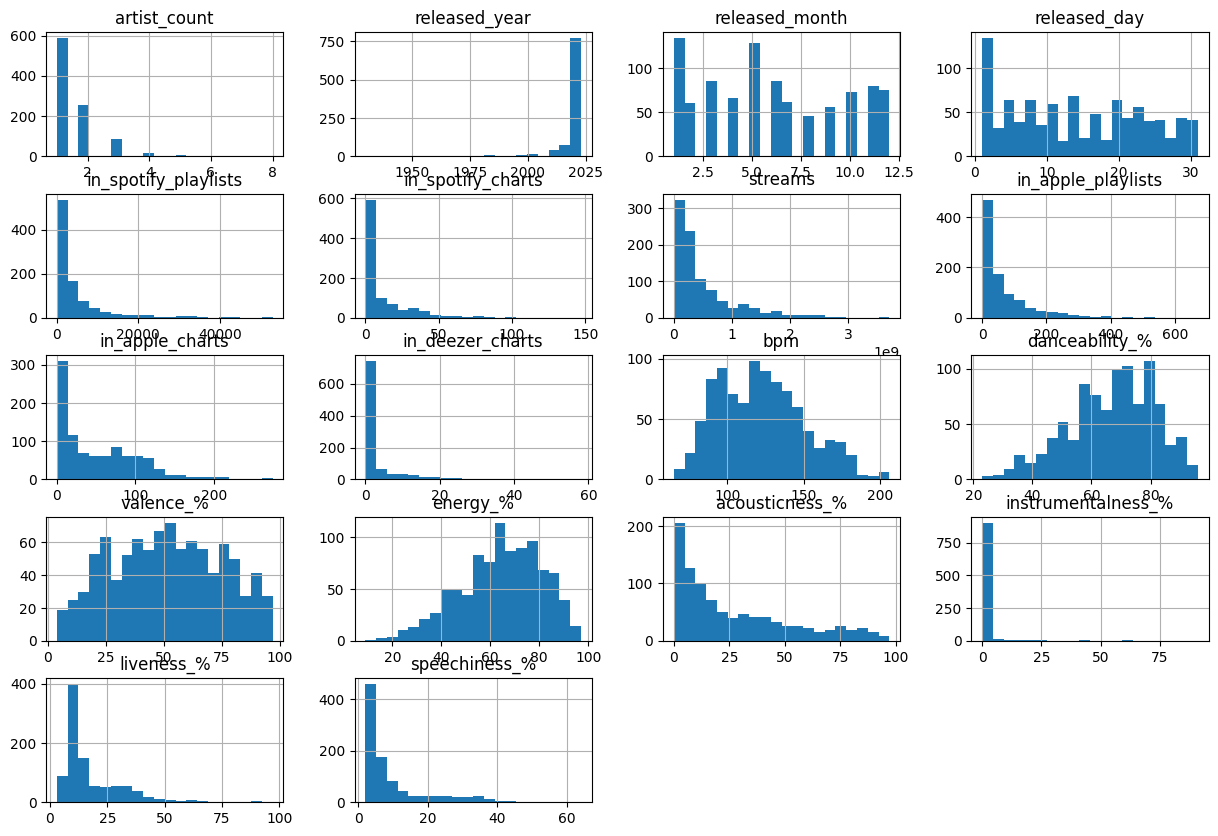

In [ ]:
# Histogram for numerical variables
data.hist(bins=20, figsize=(15, 10))
plt.show()


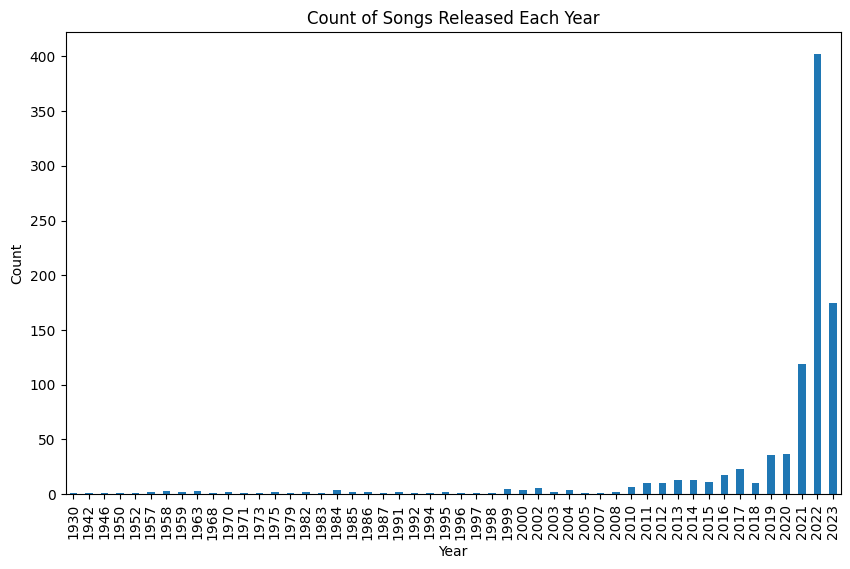

In [ ]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 6))
data['released_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Songs Released Each Year')
plt.show()

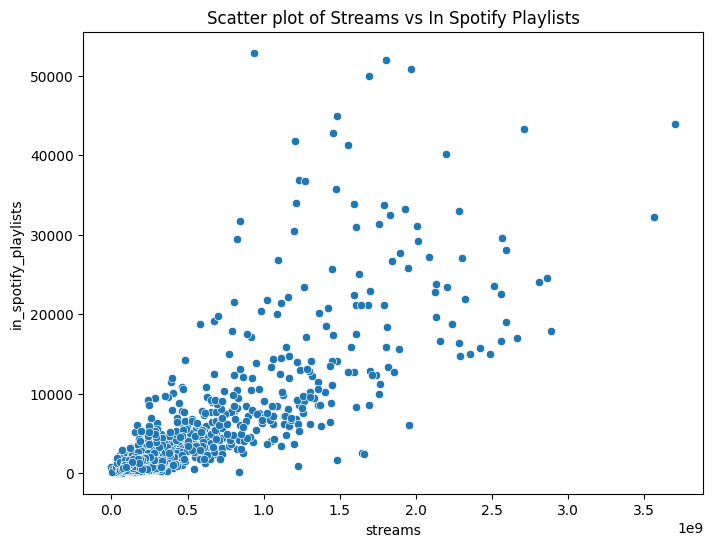

In [ ]:
# Scatter plots for relationship analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='streams', y='in_spotify_playlists', data=data)
plt.title('Scatter plot of Streams vs In Spotify Playlists')
plt.show()


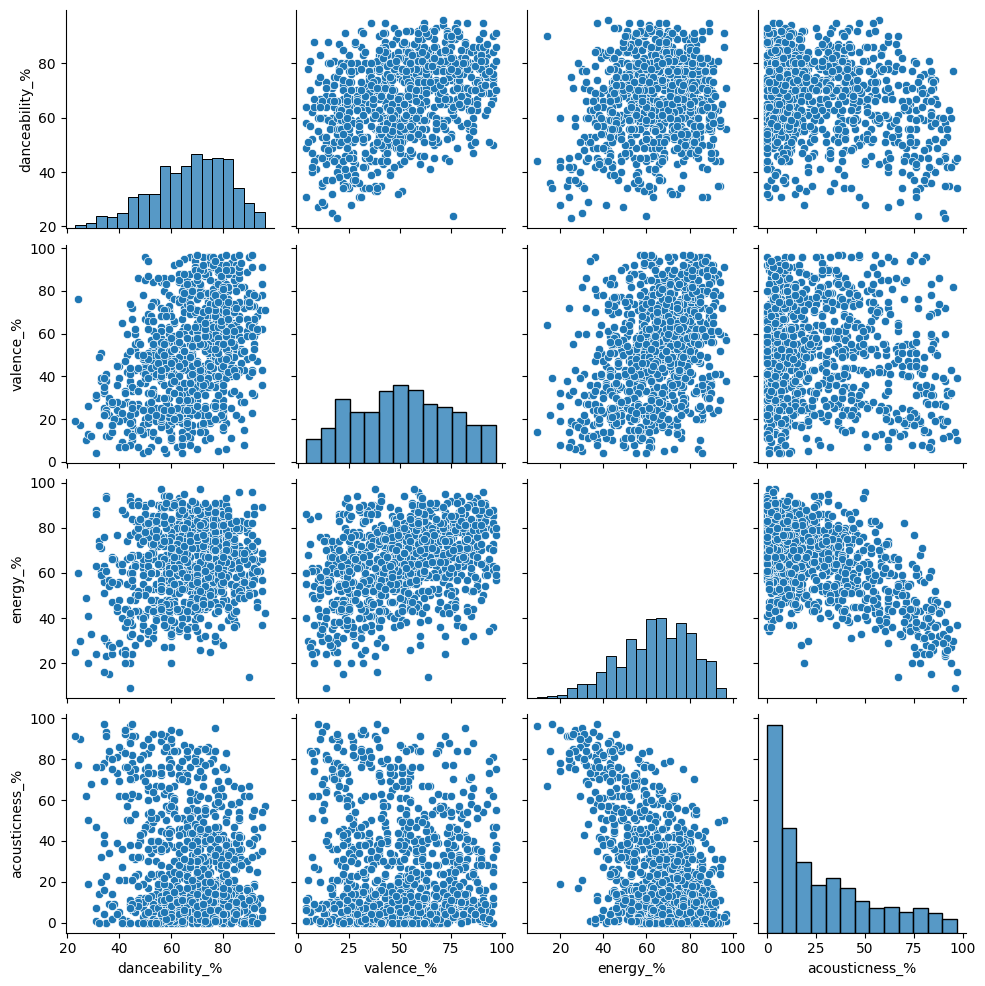

In [ ]:
# Pairplot for multiple variables
sns.pairplot(data, vars=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%'], kind='scatter')
plt.show()








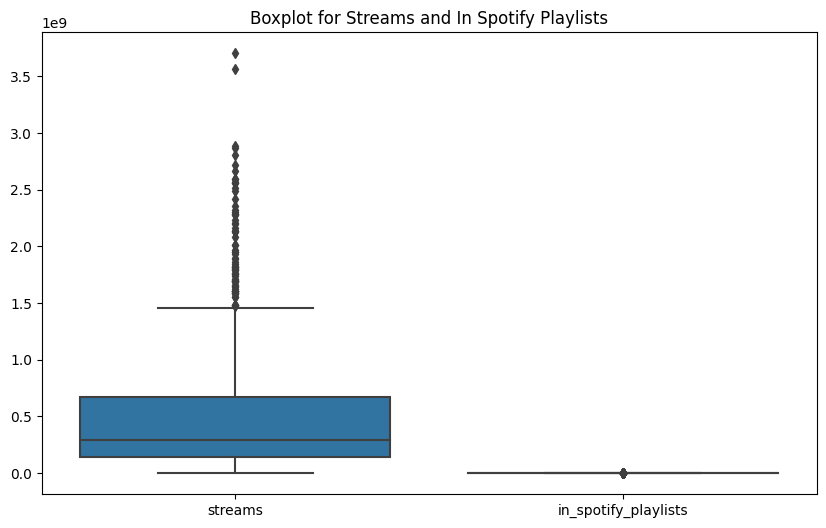

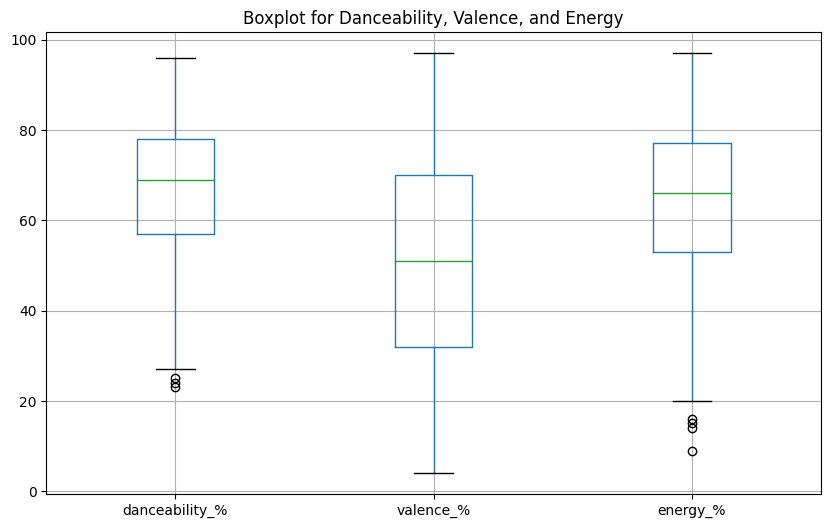

In [ ]:
# Boxplot for 'streams' and 'in_spotify_playlists'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['streams', 'in_spotify_playlists']])
plt.title('Boxplot for Streams and In Spotify Playlists')
plt.show()

# Boxplot for 'danceability_%', 'valence_%', and 'energy_%'
plt.figure(figsize=(10, 6))
data[['danceability_%', 'valence_%', 'energy_%']].boxplot()
plt.title('Boxplot for Danceability, Valence, and Energy')
plt.show()

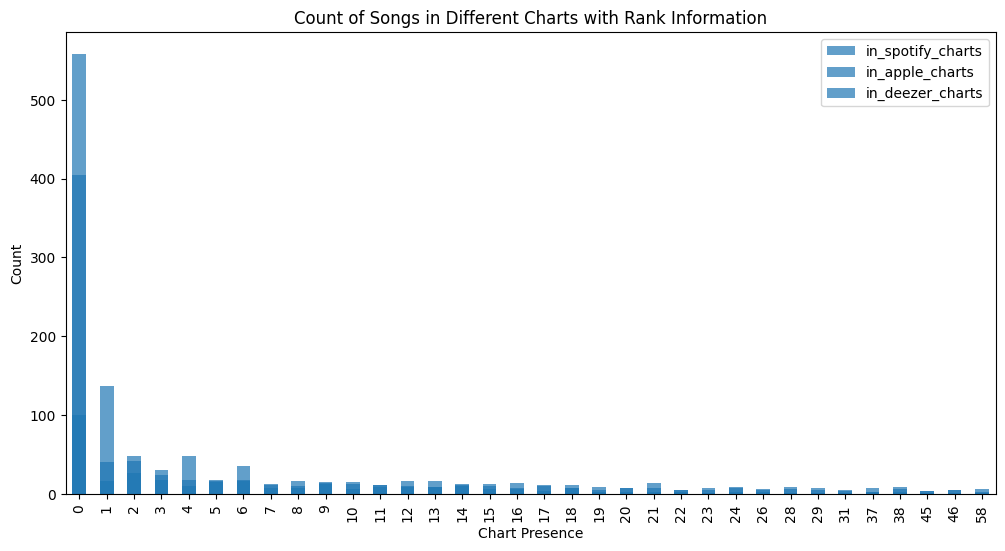

In [ ]:
# Bar plot for presence in different charts with rank information
plt.figure(figsize=(12, 6))
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
for column in chart_columns:
    data[column].value_counts().sort_index().plot(kind='bar', alpha=0.7, label=column)

plt.xlabel('Chart Presence')
plt.ylabel('Count')
plt.title('Count of Songs in Different Charts with Rank Information')
plt.legend()
plt.show()


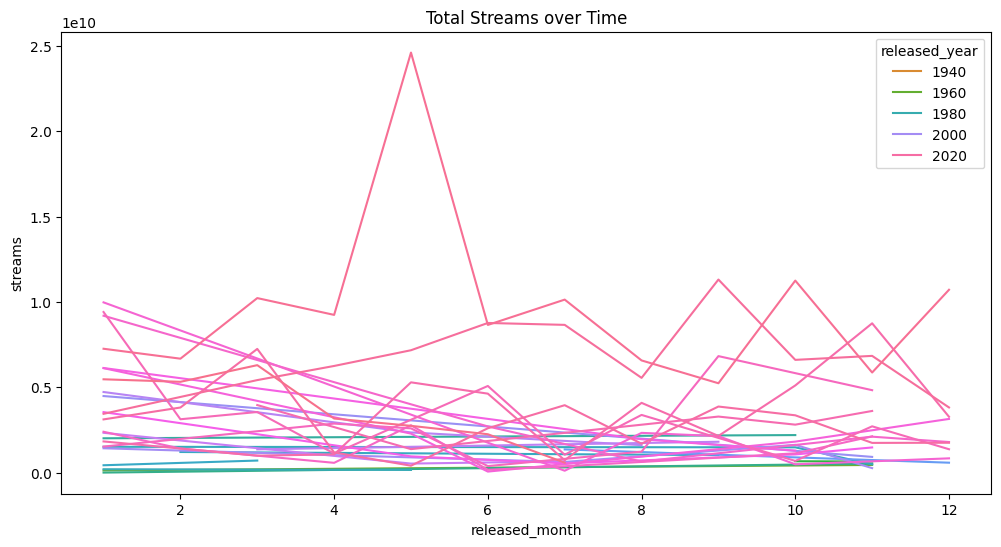

In [ ]:
# Line plot for streams over time with distinctive color palette
data_time = data.groupby(['released_year', 'released_month'])['streams'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="released_month", y="streams", hue="released_year", data=data_time, palette="husl")
plt.title('Total Streams over Time')
plt.show()


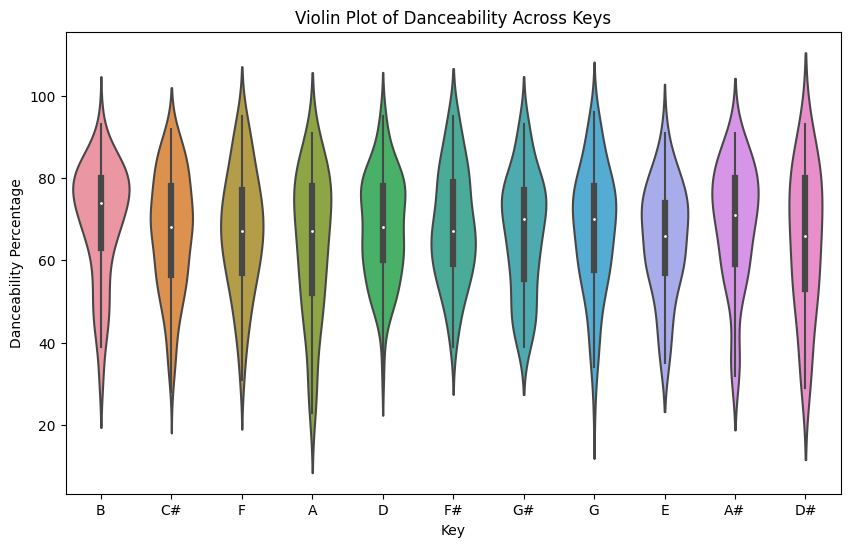

In [ ]:


plt.figure(figsize=(10, 6))
sns.violinplot(x='key', y='danceability_%', data=data)
plt.title('Violin Plot of Danceability Across Keys')
plt.xlabel('Key')
plt.ylabel('Danceability Percentage')
plt.show()


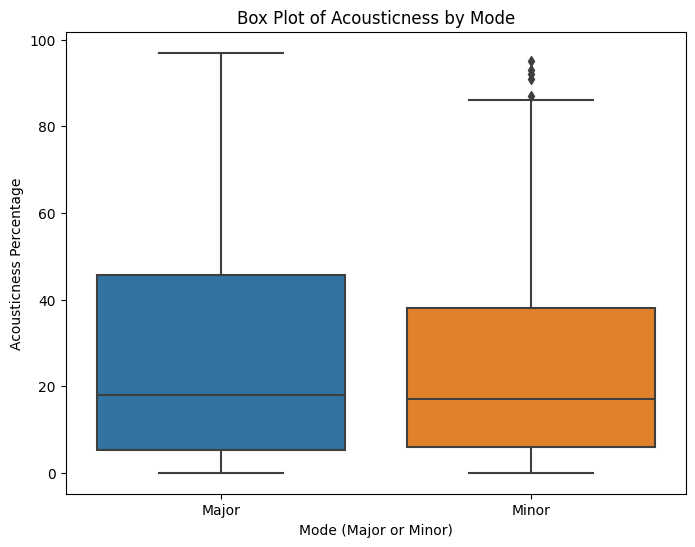

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='acousticness_%', data=data)
plt.title('Box Plot of Acousticness by Mode')
plt.xlabel('Mode (Major or Minor)')
plt.ylabel('Acousticness Percentage')
plt.show()


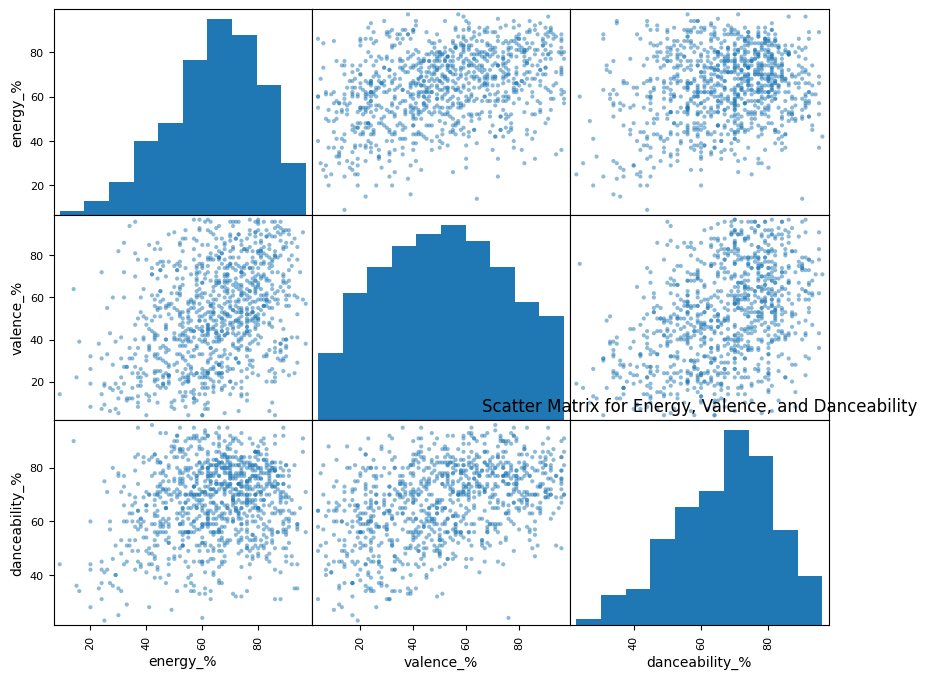

In [ ]:
pd.plotting.scatter_matrix(data[['energy_%', 'valence_%', 'danceability_%']], figsize=(10, 8))
plt.title('Scatter Matrix for Energy, Valence, and Danceability')
plt.show()


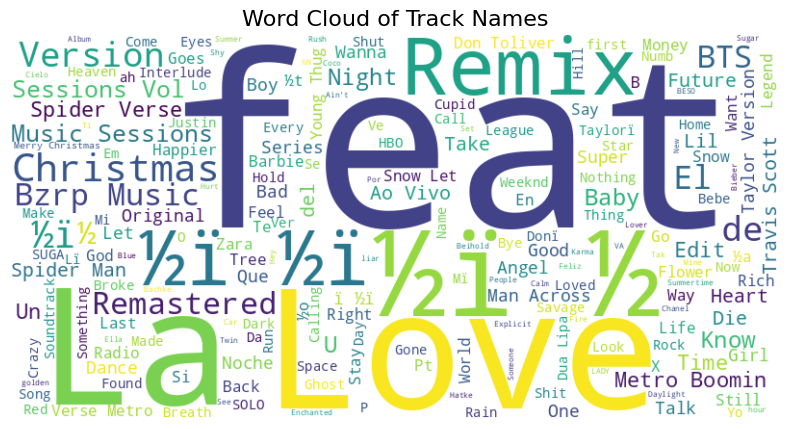

In [ ]:
from wordcloud import WordCloud


# Combine all track names into a single string
text = ' '.join(data['track_name'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names', fontsize=16)
plt.show()


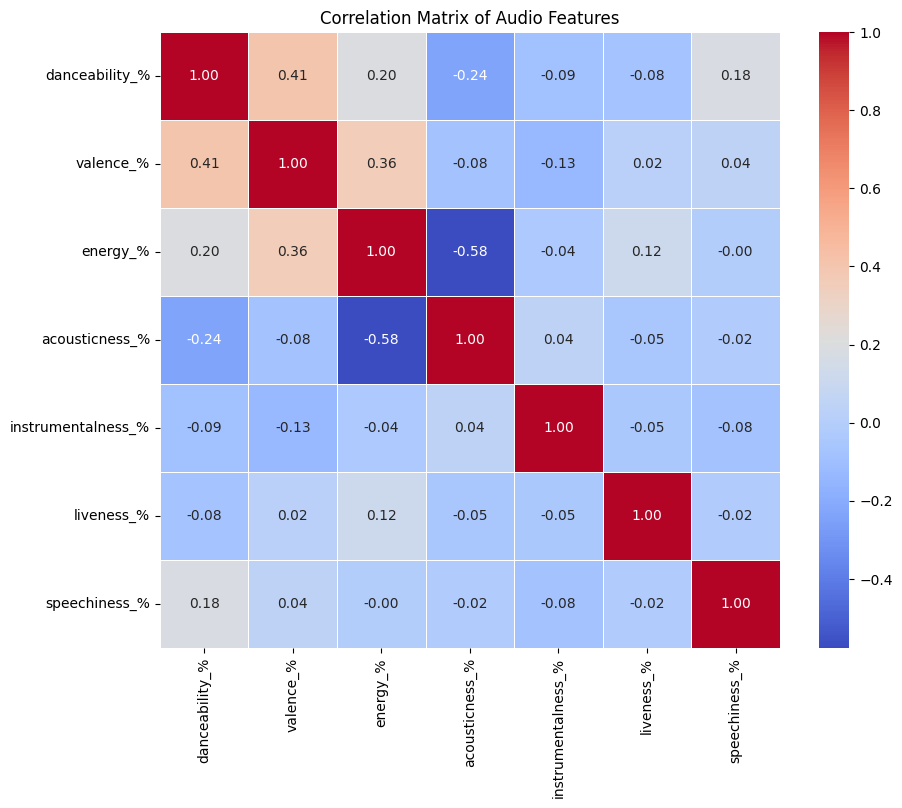

In [ ]:
audio_features = data[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
plt.figure(figsize=(10, 8))
sns.heatmap(audio_features.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()


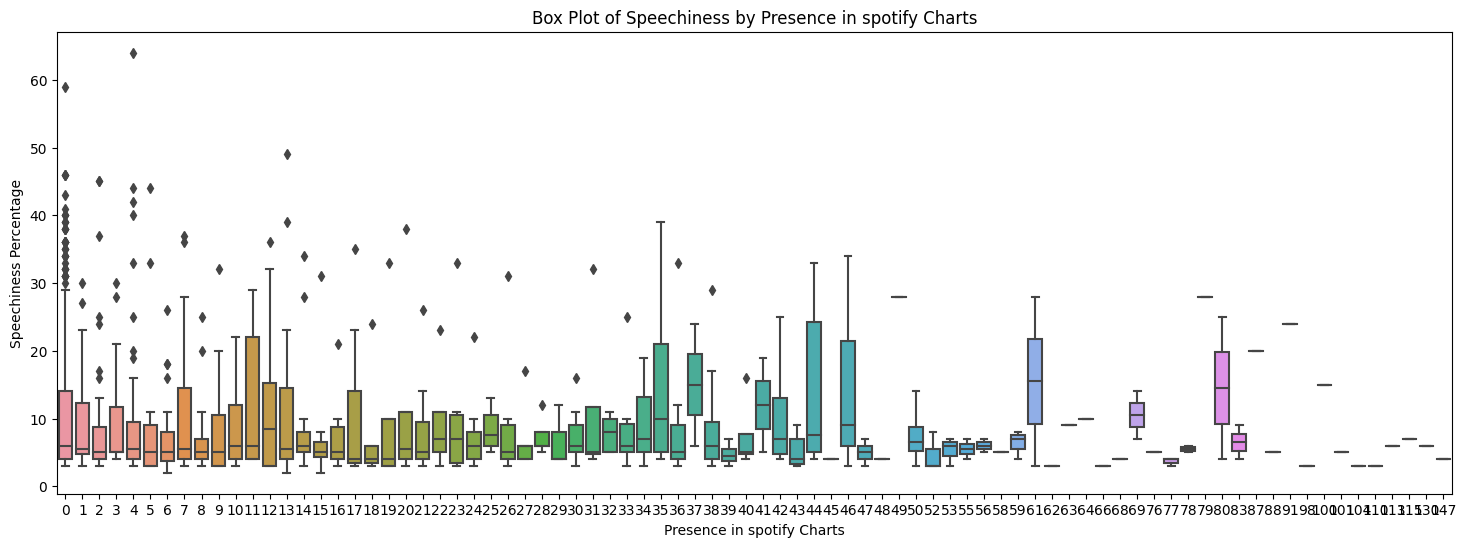

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='in_spotify_charts', y='speechiness_%', data=data)
plt.title('Box Plot of Speechiness by Presence in spotify Charts')
plt.xlabel('Presence in spotify Charts')
plt.ylabel('Speechiness Percentage')
plt.show()


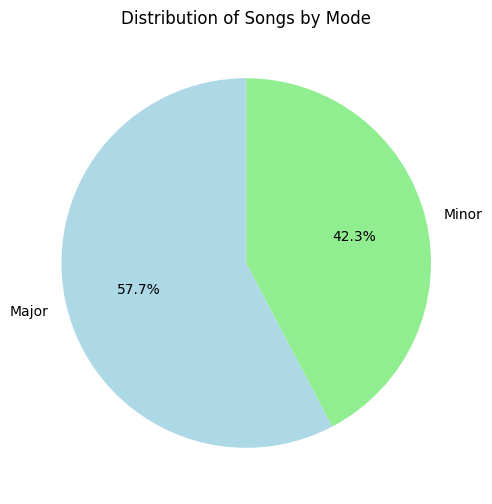

In [ ]:
mode_counts = data['mode'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Songs by Mode')
plt.show()
